In [29]:
import csv
import math
import random
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [30]:
file1=pd.read_csv("pima-indians-diabetes.data.csv")
file1.head(5)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


This file has a column or features name missing So we will assign the features to the data file.

In [31]:
column = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
file=pd.read_csv("pima-indians-diabetes.data.csv",names=column)
file.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [32]:
file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
file.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [35]:
file['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

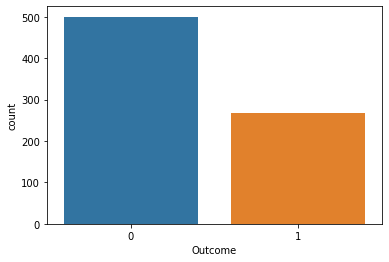

In [36]:
sn.countplot(x='Outcome',data=file)
plt.show()

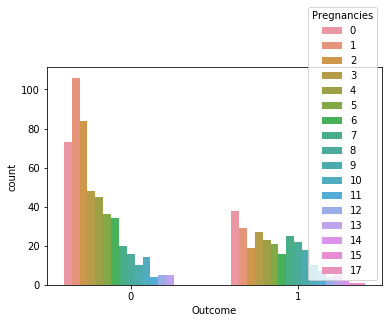

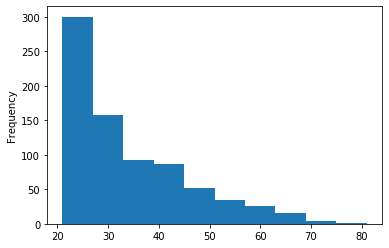

In [37]:
sn.countplot(x="Outcome",hue="Pregnancies",data=file)
plt.show()
file["Age"].plot.hist()
plt.show()

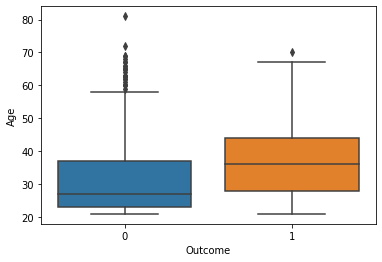

In [38]:
sn.boxplot(x='Outcome',y="Age",data=file)
plt.show()

Once we have analyzed the data, lets code the math behind it

converting the givern data's into float.
our DataFrame has a data in the form of the string. Since it is a pandaas dataframe we will not be able
to convert the stringh with . and columns name into the float value. So, we will read it in the CSV form 
and convert it into the float values.


In [39]:
def to_float():
    datas=csv.reader(open('pima-indians-diabetes.data.csv'))
    data_set=list(datas)
    for i in range (len(data_set)):
        data_set[i]=[float(x) for x in data_set[i]]
    return data_set

In [40]:
def print_rows():
    for row in to_float():
        print (row)
print_rows()

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0]
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0]
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0]
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0]
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0, 0.0]
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0, 1.0]
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0, 0.0]
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0, 1.0]
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0, 1.0]
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0, 0.0]
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0, 1.0]
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0, 0.0]
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0, 1.0]
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0, 1.0]
[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0, 1.0]
[0.0, 118.0, 84.0, 47.0, 230.0, 45.8, 0.551, 31.0, 1.0]
[7.0, 107.0, 74.0, 0.0, 0.0, 29.6, 0.254, 31.0, 1.0]
[1.0, 103.0, 30.0, 38.0, 83.

We have analyzed the data sofar.
Lets split the data to training and test dataset to measure the accuracy of the model we get.

In [41]:
def train_test(data_set,splitting_ratio):
    train_size=int(len(data_set)*splitting_ratio)
    training_set=[]
    copy_data=list(data_set)
    while len(training_set)<train_size:
        index=random.randrange(len(copy_data))
        training_set.append(copy_data.pop(index))
    return [training_set,copy_data]

Lets seperate each class and input vectors


In [42]:
def seperating_features(data_set):
    features={}
    for i in range (len(data_set)):
        input_vector=data_set[i]
        if (input_vector[-1] not in features):
            features[input_vector[-1]]=[]
        features[input_vector[-1]].append(input_vector)
    return features


In [43]:
def mean(numbers):
    total_sum=sum(numbers)
    mean=total_sum/float(len(numbers))
    return mean

def stdev(numbers):
    means=mean(numbers)
    var_num=sum([pow(x-means,2) for x in numbers])
    variance=var_num/float(len(numbers)-1)
    return math.sqrt(variance)


In [44]:
def summarize(data_set):
    summeries=[(mean(attribute),stdev(attribute)) for attribute in zip (*data_set)]
    del summeries[-1]
    return summeries
summarize(to_float())

[(3.8450520833333335, 3.3695780626988623),
 (120.89453125, 31.97261819513622),
 (69.10546875, 19.355807170644777),
 (20.536458333333332, 15.952217567727677),
 (79.79947916666667, 115.24400235133837),
 (31.992578124999977, 7.8841603203754405),
 (0.4718763020833327, 0.33132859501277484),
 (33.240885416666664, 11.76023154067868)]

In [45]:
file.describe(include='all')[1:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951


In [46]:
def summarize_by_class(data_set):
    seperated=seperating_features(data_set)
    summaries={}
    for classValue, instances in seperated.items():
        summaries[classValue]=summarize(instances)
    return summaries

In [47]:
def calculate_probability(x,mean,stdev):
    exp=math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return(1/(math.sqrt(2*math.pi)*stdev))*exp


In [48]:
def calculate_class_probabilities(summaries,input_vector):
    probabilities={}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue]=1
        for i in range (len(classSummaries)):
            mean,stdev=classSummaries[i]
            x=input_vector[i]
            probabilities[classValue] *=calculate_probability(x,mean,stdev)
        return probabilities
    


In [49]:
def predict(summaries, inputVector):
    probabilites= calculate_class_probabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilites.items():
        if bestLabel is None  or probability > bestprob:
            bestProb = probability
            bestLabel = classValue
    return bestLabel
            

In [50]:
def get_prediction(summaries,test_set):
    predictions=[]
    for i in range (len(test_set)):
        result = predict(summaries, test_set[i])
        predictions.append(result)
    return predictions


In [51]:
def get_accuracy(test_set,predictions):
    correct = 0
    for x in range (len(test_set)):
        if test_set[x][-1] == predictions[x]:
            correct +=1
    return (correct/float(len(test_set)))*100.0
    

In [52]:
def main():
    split_ratio = 0.70
    data_set= to_float()
    train_set, test_set = train_test(data_set,split_ratio)
    summaries=summarize_by_class(train_set)
    predictions=get_prediction(summaries,test_set)
    accuracy=get_accuracy(test_set, predictions)
    print("Accuracy is : {0}%".format(accuracy))

    
main()


Accuracy is : 67.96536796536796%


In [53]:
file.shape

(768, 9)

In [71]:
X = file.iloc[:,[0,1,2,3,4,5,6,7]].values
y=file.iloc[:,8].values
train_x,test_x,train_y,test_y = train_test_split (X,y,test_size=0.3, random_state=0)
model=GaussianNB()
model.fit(train_x,train_y)
y_predict=model.predict(test_x)


In [72]:
print(metrics.classification_report(test_y, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [70]:
print(metrics.confusion_matrix(test_y,y_predict))

[[147  23]
 [ 41  43]]


In [86]:
df=pd.DataFrame({"predicted : ": y_predict, "Actual: ":test_y})
df.head(20)

,predicted :,Actual:
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,1,0
9,0,0
